> __Purpose:__ This NB visualizes the results of the full study for various finetuning approaches. Need to add hyperparam tuning... maybe turn off Earlystopping?

In [1]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
#import matplotlib.pyplot as plt
#import pandas as pd

from global_seed import set_seed
set_seed()

from agglo_model_clust import *
from cluster_acc_viz_funcs import *
from DNN_FT_funcs import *
from DNN_AMC_funcs import *
from full_study_funcs import * 
from revamped_model_classes import *
from hyperparam_tuned_configs import *

import os
cwd = os.getcwd()
print("Current Working Directory: ", cwd)


Global seed set to 17
Current Working Directory:  c:\Users\kdmen\Repos\fl-gestures\April_25


In [ ]:
MODEL_STR = "DynamicMomonaNet"
MY_CONFIG = DynamicMomonaNetR_config

MY_CONFIG["user_split_json_filepath"] = "fixed_user_splits\\24_8_user_splits_RS17.json"

NUM_MONTE_CARLO_RUNS = 1
SAVE_FIGS = False
timestamp = datetime.now().strftime("%Y%m%d_%H%M")


In [3]:
expdef_df = load_expdef_gestures(feateng_method=MY_CONFIG["feature_engr"])

print(expdef_df.shape)
expdef_df.head()

(3200, 6)


,Participant,Gesture_ID,Gesture_Num,feature,Gesture_Encoded,Cluster_ID
0,P102,pan,1,"[[-1.5563754649803136, -0.17884213655174025, -...",5,6
1,P102,pan,2,"[[-2.0947934429427453, -0.18463052523258242, -...",5,6
2,P102,pan,3,"[[-1.47972105766918, -0.14489860670069354, -0....",5,6
3,P102,pan,4,"[[-1.4504054170702374, -0.18478424991674858, -...",5,6
4,P102,pan,5,"[[-1.809093742221055, -0.21738573258562152, -0...",5,6


In [4]:
# Load the CLUSTERING RESULTS DATA
with open('C:\\Users\\kdmen\\Repos\\fl-gestures\\April_25\\results\\clustering_models\\20250210_2137\\20250210_2137_DynamicMomonaNet_agglo_merge_res.pkl', 'rb') as f:
    merge_log = pickle.load(f)
    intra_cluster_performance = pickle.load(f)
    cross_cluster_performance = pickle.load(f)
    nested_clus_model_dict = pickle.load(f)

print("Data has been loaded successfully!")

Data has been loaded successfully!


In [5]:
full_path = os.path.join("C:\\Users\\kdmen\\Repos\\fl-gestures\\April_25\\models\\20250218_1708", '248_RS17_pretrained_DynamicMomonaNet_model.pth')

print("Full Path:", full_path)
# Load the pretrained model
pretrained_generic_model = select_model(MODEL_STR, MY_CONFIG)
pretrained_generic_model.load_state_dict(torch.load(full_path))

Full Path: C:\Users\kdmen\Repos\fl-gestures\April_25\models\20250218_1708\248_RS17_pretrained_DynamicMomonaNet_model.pth


<All keys matched successfully>

In [ ]:
import json
# Load the fixed user splits
with open("fixed_user_splits\\24_8_user_splits_RS17.json", "r") as f:
    splits = json.load(f)
all_participants = splits["all_users"]
test_participants = splits["test_users"]


In [ ]:
#"finetune_strategy": "progressive_unfreeze",
#    - "full": Train the entire model.
#    - "freeze_cnn": Freeze CNN, train LSTM and dense layers.
#    - "freeze_all_but_final_dense": Freeze CNN + LSTM, train only dense layers.
#    - "progressive_unfreeze": Start with frozen CNN/LSTM, progressively unfreeze.
#"progressive_unfreezing_schedule": 5,
#"ft_weight_decay": 0.0,
#"ft_learning_rate": 0.001,
#"ft_batch_size": 10,
#"num_ft_epochs": 100,

progunfreezingFT_config = copy.deepcopy(MY_CONFIG)

originalELEC573FT_config = copy.deepcopy(MY_CONFIG)
originalELEC573FT_config["batch_size"] = 32
originalELEC573FT_config["finetune_strategy"] = "full"
originalELEC573FT_config["use_earlystopping"] = False
originalELEC573FT_config["num_ft_epochs"] = 50
originalELEC573FT_config["ft_learning_rate"] = 0.001
originalELEC573FT_config["lr_scheduler_factor"] = 0.0
originalELEC573FT_config[""] = 0.0

fullFT_config = copy.deepcopy(MY_CONFIG)
fullFT_config["finetune_strategy"] = "full"

freezeCNNFT_config = copy.deepcopy(MY_CONFIG)
freezeCNNFT_config["finetune_strategy"] = "freeze_cnn"

freezeallbutdenseFT_config = copy.deepcopy(MY_CONFIG)
freezeallbutdenseFT_config["finetune_strategy"] = "freeze_all_but_final_dense"



## ONE-SHOT: 1 trial for training (FT) and cluster assignment

In [8]:
NUM_FT_TRIALS = 1
shared_trial_data_splits_lst = create_shared_trial_data_splits(expdef_df, all_participants, test_participants, num_monte_carlo_runs=NUM_MONTE_CARLO_RUNS, num_train_gesture_trials=8, num_ft_gesture_trials=NUM_FT_TRIALS)


> FT0: Original ELEC573 Finetuning (Full, NO EARLY STOPPING)
- I do have the learning rate scheduler on atm (which wasn't there originally) but it is somewhat tricky to remove. I'll just see what happens. Likely will have to loop back to remove it

In [9]:
originalELEC573FT_data_dict_1_1 = finetuning_run(shared_trial_data_splits_lst, originalELEC573FT_config, pretrained_generic_model, nested_clus_model_dict)

PID P010, 1/8
Cluster 39 had the highest accuracy (0.4)
PID P103, 2/8
Cluster 31 had the highest accuracy (0.6)
PID P104, 3/8
Cluster 31 had the highest accuracy (0.2)
PID P108, 4/8
Cluster 40 had the highest accuracy (0.6)
PID P116, 5/8
Cluster 31 had the highest accuracy (0.4)
PID P125, 6/8
Cluster 39 had the highest accuracy (0.6)
PID P127, 7/8
Cluster 41 had the highest accuracy (0.5)
PID P128, 8/8
Cluster 41 had the highest accuracy (0.5)


In [10]:
# Printing acc not working for some reason, tries to tell me its a list idk
## It looks fine here so idk the problem
originalELEC573FT_data_dict_1_1['train_test_logs_list'][0]['P010']['ft_centralized_acc']

0.0

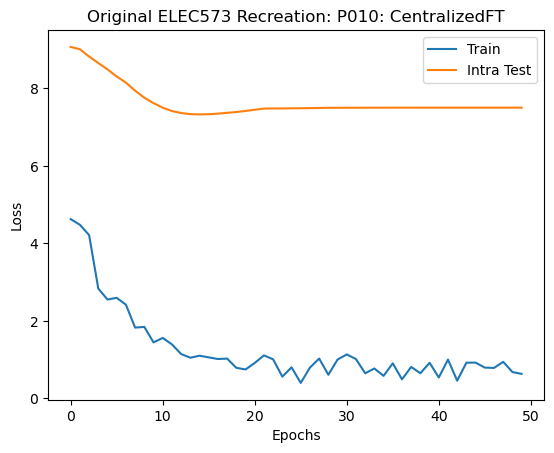

In [11]:
plot_train_test_curves(originalELEC573FT_data_dict_1_1['train_test_logs_list'][0]['P010'], "Original ELEC573 Recreation: P010: CentralizedFT", print_acc=False, acc_keys=['ft_centralized_acc', None, None], log_keys=['ft_centralized_train_loss_log', 'ft_centralized_test_loss_log', None])

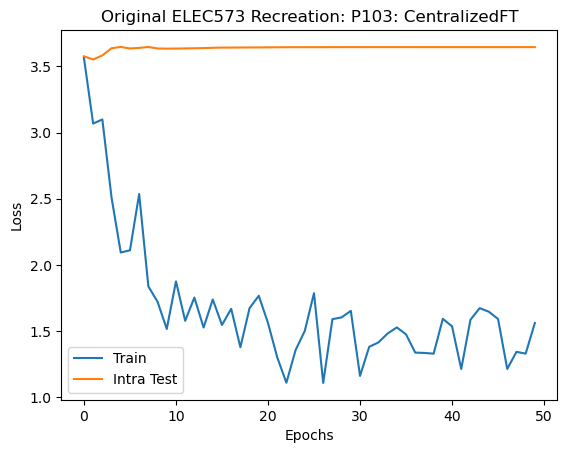

In [12]:
plot_train_test_curves(originalELEC573FT_data_dict_1_1['train_test_logs_list'][0]['P103'], "Original ELEC573 Recreation: P103: CentralizedFT", print_acc=False, acc_keys=['ft_centralized_acc', None, None], log_keys=['ft_centralized_train_loss_log', 'ft_centralized_test_loss_log', None])

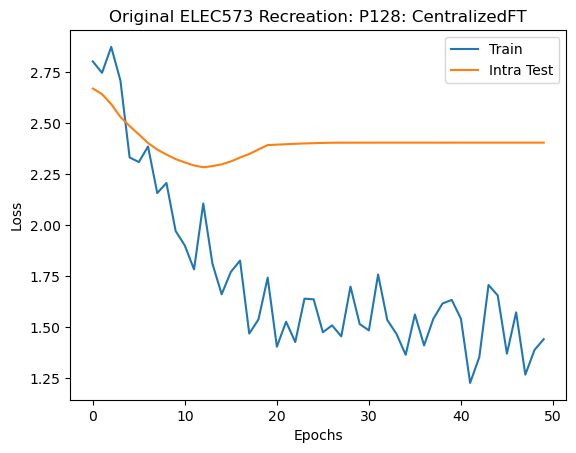

In [13]:
plot_train_test_curves(originalELEC573FT_data_dict_1_1['train_test_logs_list'][0]['P128'], "Original ELEC573 Recreation: P128: CentralizedFT", print_acc=False, acc_keys=['ft_centralized_acc', None, None], log_keys=['ft_centralized_train_loss_log', 'ft_centralized_test_loss_log', None])

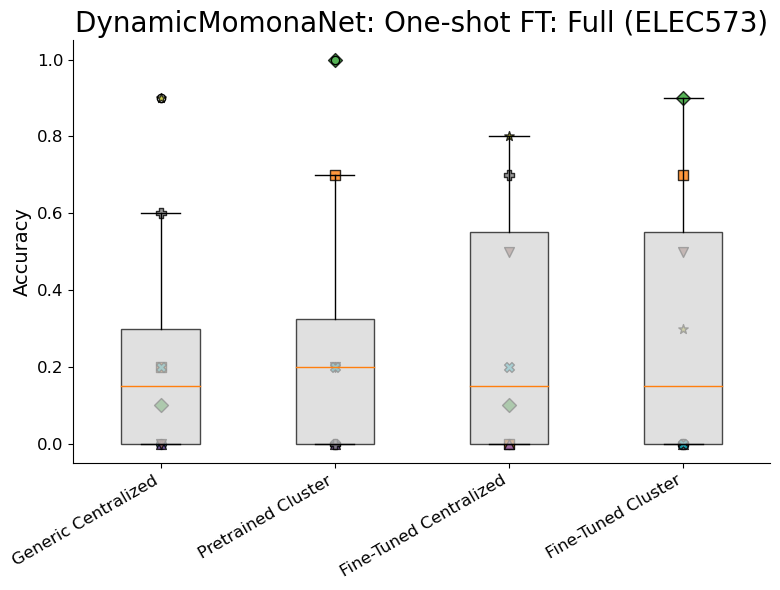

In [14]:
plot_model_acc_boxplots(originalELEC573FT_data_dict_1_1, my_title=f"{MODEL_STR}: One-shot FT: Full (ELEC573)", save_fig=False, plot_save_name=f"Final_{MODEL_STR}_Acc_1TA_1TT", 
                            data_keys=['centralized_acc_data', 'pretrained_cluster_acc_data', 'ft_centralized_acc_data', 'ft_cluster_acc_data'],
                            labels=['Generic Centralized', 'Pretrained Cluster', 'Fine-Tuned Centralized', 'Fine-Tuned Cluster'])
    

> FT1: Progressive Layer Unfreezing

In [15]:
progunfreezingFT_data_dict_1_1 = finetuning_run(shared_trial_data_splits_lst, progunfreezingFT_config, pretrained_generic_model, nested_clus_model_dict)

PID P010, 1/8
FT P010_: Early stopping reached after 9 epochs
Cluster 39 had the highest accuracy (0.7)
FT P010_: Early stopping reached after 14 epochs
PID P103, 2/8
FT P103_: Early stopping reached after 17 epochs
Cluster 31 had the highest accuracy (0.7)
FT P103_: Early stopping reached after 9 epochs
PID P104, 3/8
FT P104_: Early stopping reached after 16 epochs
Cluster 31 had the highest accuracy (0.1)
FT P104_: Early stopping reached after 14 epochs
PID P108, 4/8
FT P108_: Early stopping reached after 26 epochs
Cluster 40 had the highest accuracy (1.0)
FT P108_: Early stopping reached after 9 epochs
PID P116, 5/8
FT P116_: Early stopping reached after 9 epochs
Cluster 31 had the highest accuracy (0.7)
FT P116_: Early stopping reached after 18 epochs
PID P125, 6/8
FT P125_: Early stopping reached after 9 epochs
Cluster 39 had the highest accuracy (0.9)
FT P125_: Early stopping reached after 25 epochs
PID P127, 7/8
FT P127_: Early stopping reached after 9 epochs
Cluster 41 had the 

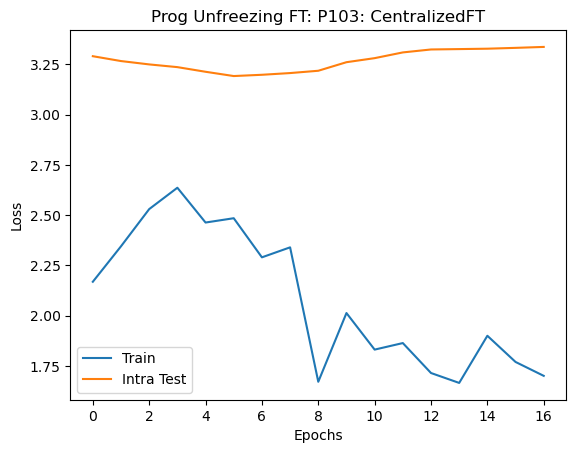

In [16]:
plot_train_test_curves(progunfreezingFT_data_dict_1_1['train_test_logs_list'][0]['P103'], "Prog Unfreezing FT: P103: CentralizedFT", print_acc=False, acc_keys=['ft_centralized_acc', None, None], log_keys=['ft_centralized_train_loss_log', 'ft_centralized_test_loss_log', None])

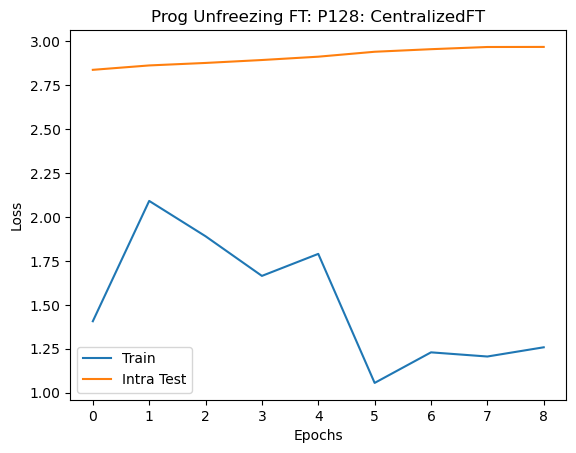

In [17]:
plot_train_test_curves(progunfreezingFT_data_dict_1_1['train_test_logs_list'][0]['P128'], "Prog Unfreezing FT: P128: CentralizedFT", print_acc=False, acc_keys=['ft_centralized_acc', None, None], log_keys=['ft_centralized_train_loss_log', 'ft_centralized_test_loss_log', None])

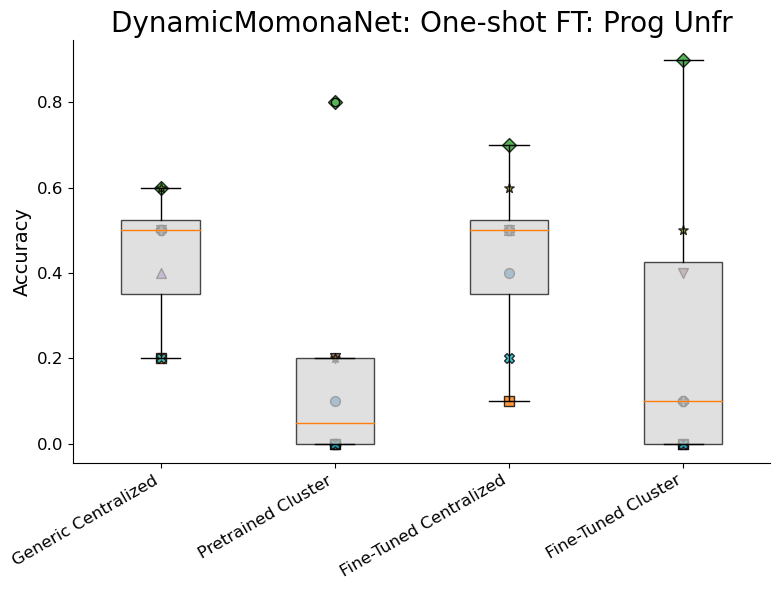

In [18]:
plot_model_acc_boxplots(progunfreezingFT_data_dict_1_1, my_title=f"{MODEL_STR}: One-shot FT: Prog Unfr", save_fig=False, plot_save_name=f"Final_{MODEL_STR}_Acc_1TA_1TT", 
                            data_keys=['centralized_acc_data', 'pretrained_cluster_acc_data', 'ft_centralized_acc_data', 'ft_cluster_acc_data'],
                            labels=['Generic Centralized', 'Pretrained Cluster', 'Fine-Tuned Centralized', 'Fine-Tuned Cluster'])
    

> FT2: Retraining full model weights

In [19]:
fullFT_data_dict_1_1 = finetuning_run(shared_trial_data_splits_lst, fullFT_config, pretrained_generic_model, nested_clus_model_dict)

PID P010, 1/8
FT P010_: Early stopping reached after 9 epochs
Cluster 39 had the highest accuracy (0.8)
FT P010_: Early stopping reached after 34 epochs
PID P103, 2/8
FT P103_: Early stopping reached after 16 epochs
Cluster 31 had the highest accuracy (0.7)
FT P103_: Early stopping reached after 9 epochs
PID P104, 3/8
FT P104_: Early stopping reached after 9 epochs
Cluster 31 had the highest accuracy (0.3)
FT P104_: Early stopping reached after 15 epochs
PID P108, 4/8
FT P108_: Early stopping reached after 9 epochs
Cluster 40 had the highest accuracy (1.0)
FT P108_: Early stopping reached after 9 epochs
PID P116, 5/8
FT P116_: Early stopping reached after 28 epochs
Cluster 31 had the highest accuracy (0.9)
FT P116_: Early stopping reached after 18 epochs
PID P125, 6/8
FT P125_: Early stopping reached after 9 epochs
Cluster 39 had the highest accuracy (1.0)
FT P125_: Early stopping reached after 19 epochs
PID P127, 7/8
FT P127_: Early stopping reached after 9 epochs
Cluster 41 had the h

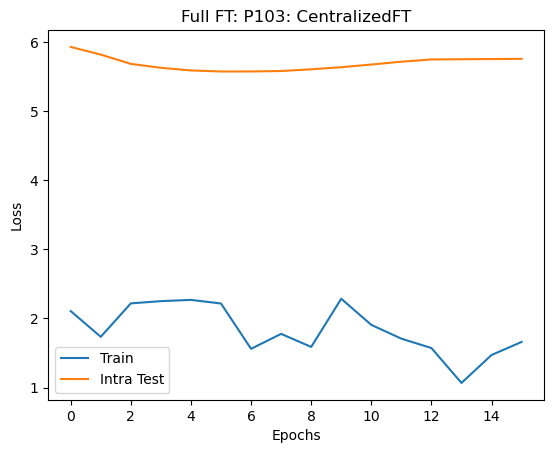

In [20]:
plot_train_test_curves(fullFT_data_dict_1_1['train_test_logs_list'][0]['P103'], "Full FT: P103: CentralizedFT", print_acc=False, acc_keys=['ft_centralized_acc', None, None], log_keys=['ft_centralized_train_loss_log', 'ft_centralized_test_loss_log', None])

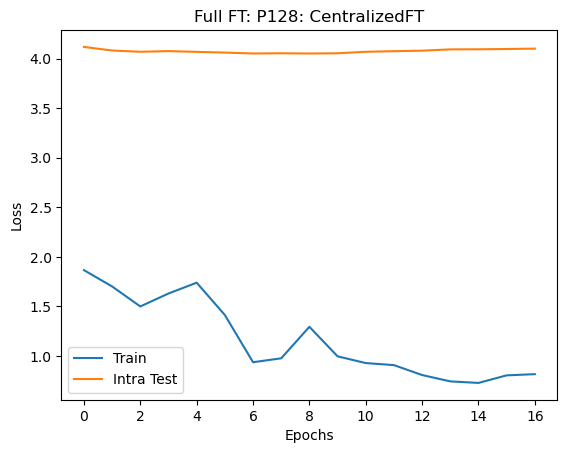

In [21]:
plot_train_test_curves(fullFT_data_dict_1_1['train_test_logs_list'][0]['P128'], "Full FT: P128: CentralizedFT", print_acc=False, acc_keys=['ft_centralized_acc', None, None], log_keys=['ft_centralized_train_loss_log', 'ft_centralized_test_loss_log', None])

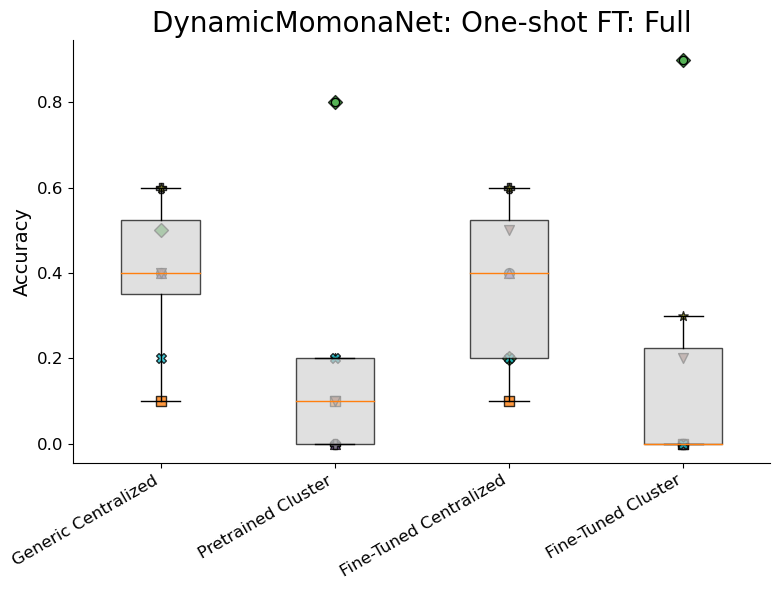

In [22]:
plot_model_acc_boxplots(fullFT_data_dict_1_1, my_title=f"{MODEL_STR}: One-shot FT: Full", save_fig=False, plot_save_name=f"Final_{MODEL_STR}_Acc_1TA_1TT", 
                            data_keys=['centralized_acc_data', 'pretrained_cluster_acc_data', 'ft_centralized_acc_data', 'ft_cluster_acc_data'],
                            labels=['Generic Centralized', 'Pretrained Cluster', 'Fine-Tuned Centralized', 'Fine-Tuned Cluster'])
    

> FT3: Freeze CNN, FT LSTM+Dense

In [23]:
freezeCNNFT_data_dict_1_1 = finetuning_run(shared_trial_data_splits_lst, freezeCNNFT_config, pretrained_generic_model, nested_clus_model_dict)

PID P010, 1/8
FT P010_: Early stopping reached after 9 epochs
Cluster 39 had the highest accuracy (0.9)
FT P010_: Early stopping reached after 10 epochs
PID P103, 2/8
FT P103_: Early stopping reached after 26 epochs
Cluster 31 had the highest accuracy (0.8)
FT P103_: Early stopping reached after 9 epochs
PID P104, 3/8
FT P104_: Early stopping reached after 9 epochs
Cluster 31 had the highest accuracy (0.5)
FT P104_: Early stopping reached after 16 epochs
PID P108, 4/8
FT P108_: Early stopping reached after 9 epochs
Cluster 40 had the highest accuracy (1.0)
FT P108_: Early stopping reached after 18 epochs
PID P116, 5/8
FT P116_: Early stopping reached after 18 epochs
Cluster 31 had the highest accuracy (1.0)
FT P116_: Early stopping reached after 32 epochs
PID P125, 6/8
FT P125_: Early stopping reached after 9 epochs
Cluster 39 had the highest accuracy (1.0)
FT P125_: Early stopping reached after 18 epochs
PID P127, 7/8
FT P127_: Early stopping reached after 15 epochs
Cluster 41 had the

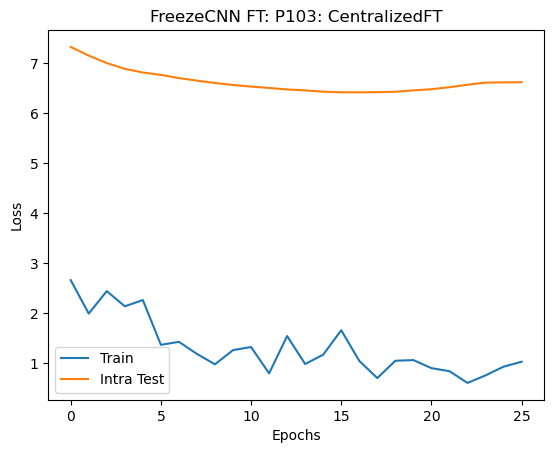

In [24]:
plot_train_test_curves(freezeCNNFT_data_dict_1_1['train_test_logs_list'][0]['P103'], "FreezeCNN FT: P103: CentralizedFT", print_acc=False, acc_keys=['ft_centralized_acc', None, None], log_keys=['ft_centralized_train_loss_log', 'ft_centralized_test_loss_log', None])

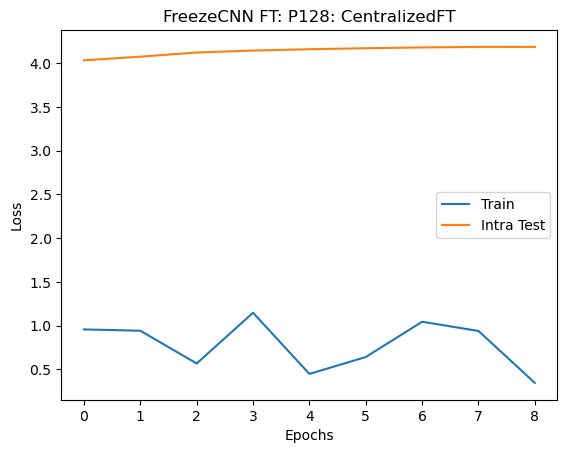

In [25]:
plot_train_test_curves(freezeCNNFT_data_dict_1_1['train_test_logs_list'][0]['P128'], "FreezeCNN FT: P128: CentralizedFT", print_acc=False, acc_keys=['ft_centralized_acc', None, None], log_keys=['ft_centralized_train_loss_log', 'ft_centralized_test_loss_log', None])

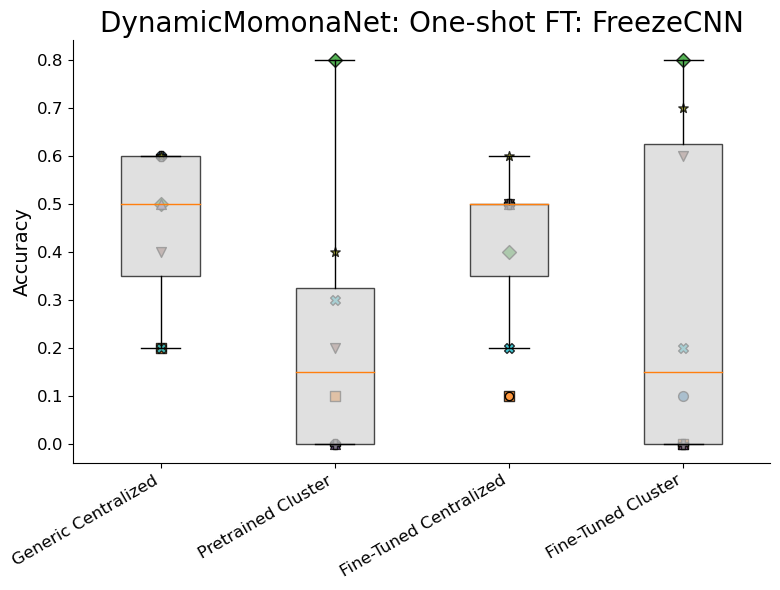

In [26]:
plot_model_acc_boxplots(freezeCNNFT_data_dict_1_1, my_title=f"{MODEL_STR}: One-shot FT: FreezeCNN", save_fig=False, plot_save_name=f"Final_{MODEL_STR}_Acc_1TA_1TT", 
                            data_keys=['centralized_acc_data', 'pretrained_cluster_acc_data', 'ft_centralized_acc_data', 'ft_cluster_acc_data'],
                            labels=['Generic Centralized', 'Pretrained Cluster', 'Fine-Tuned Centralized', 'Fine-Tuned Cluster'])
    

> FT4: Freeze all layers but final dense layer

In [27]:
freezeallbutdenseFT_data_dict_1_1 = finetuning_run(shared_trial_data_splits_lst, freezeallbutdenseFT_config, pretrained_generic_model, nested_clus_model_dict)

PID P010, 1/8
FT P010_: Early stopping reached after 9 epochs
Cluster 39 had the highest accuracy (1.0)
FT P010_: Early stopping reached after 9 epochs
PID P103, 2/8
FT P103_: Early stopping reached after 38 epochs
Cluster 31 had the highest accuracy (0.7)
FT P103_: Early stopping reached after 9 epochs
PID P104, 3/8
FT P104_: Early stopping reached after 9 epochs
Cluster 31 had the highest accuracy (0.7)
FT P104_: Early stopping reached after 89 epochs
PID P108, 4/8
FT P108_: Early stopping reached after 9 epochs
Cluster 40 had the highest accuracy (1.0)
FT P108_: Early stopping reached after 9 epochs
PID P116, 5/8
FT P116_: Early stopping reached after 9 epochs
Cluster 31 had the highest accuracy (1.0)
FT P116_: Early stopping reached after 28 epochs
PID P125, 6/8
FT P125_: Early stopping reached after 22 epochs
Cluster 39 had the highest accuracy (1.0)
FT P125_: Early stopping reached after 27 epochs
PID P127, 7/8
FT P127_: Early stopping reached after 48 epochs
Cluster 41 had the h

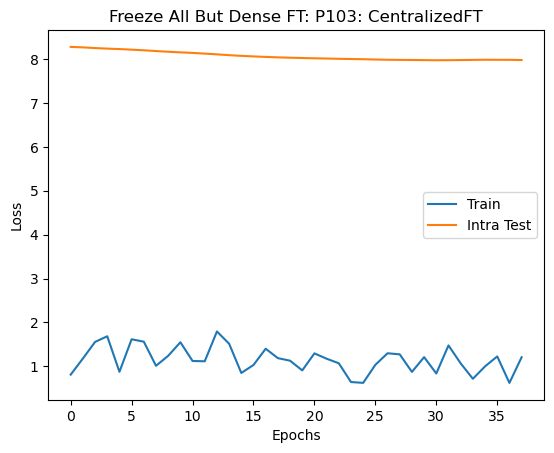

In [28]:
plot_train_test_curves(freezeallbutdenseFT_data_dict_1_1['train_test_logs_list'][0]['P103'], "Freeze All But Dense FT: P103: CentralizedFT", print_acc=False, acc_keys=['ft_centralized_acc', None, None], log_keys=['ft_centralized_train_loss_log', 'ft_centralized_test_loss_log', None])

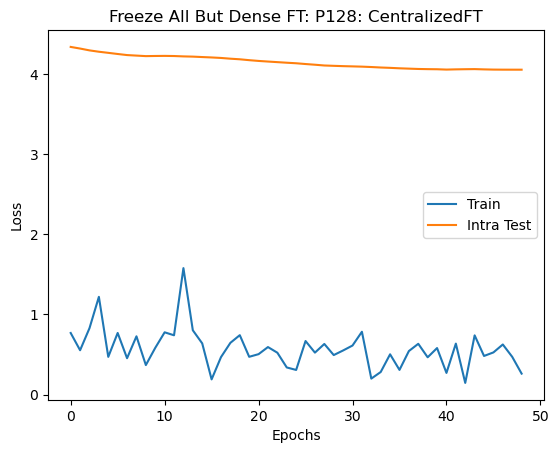

In [29]:
plot_train_test_curves(freezeallbutdenseFT_data_dict_1_1['train_test_logs_list'][0]['P128'], "Freeze All But Dense FT: P128: CentralizedFT", print_acc=False, acc_keys=['ft_centralized_acc', None, None], log_keys=['ft_centralized_train_loss_log', 'ft_centralized_test_loss_log', None])

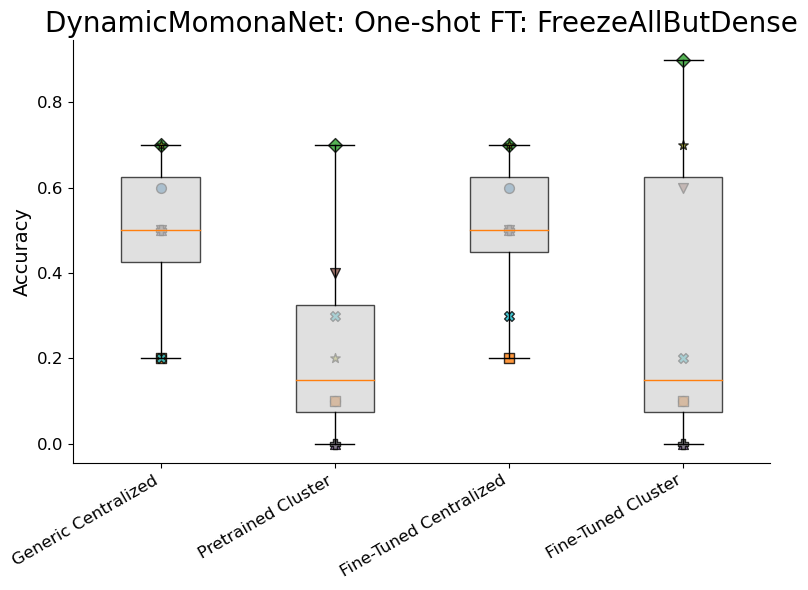

In [30]:
plot_model_acc_boxplots(freezeallbutdenseFT_data_dict_1_1, my_title=f"{MODEL_STR}: One-shot FT: FreezeAllButDense", save_fig=False, plot_save_name=f"Final_{MODEL_STR}_Acc_1TA_1TT", 
                            data_keys=['centralized_acc_data', 'pretrained_cluster_acc_data', 'ft_centralized_acc_data', 'ft_cluster_acc_data'],
                            labels=['Generic Centralized', 'Pretrained Cluster', 'Fine-Tuned Centralized', 'Fine-Tuned Cluster'])
    